In [1]:
#  필요 라이브러리 import

import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [2]:
# 사용할 엑셀 파일을 모두 all_files에 저장

all_files = glob.glob('./EnglishKERIS*.xls')
all_files

['.\\EnglishKERIS(1).xls',
 '.\\EnglishKERIS(2).xls',
 '.\\EnglishKERIS(3).xls',
 '.\\EnglishKERIS(4).xls',
 '.\\EnglishKERIS.xls']

In [3]:
# 빈배열을 만들고 병합한 엑셀 데이터의 내용을 읽어 데이터 프레임으로 전환 후 append

all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[1]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,A Study on the Goal-Setting of Financial Inves...,Lee Ju-ho,J-INSTITUTE,2017
1,NaN,2,A Study on the Impact of R&D Investment on Fir...,주흥영,한국상업교육학회,2020
2,NaN,3,An Analysis on Determinants of Chinese RMB as ...,남수중,한국동북아경제학회,2020
3,NaN,4,The Relationship between Cash Flows and Invest...,Jie Deng,한국물리학회,2020
4,NaN,5,The Impact of Venture Capital Investment on th...,Tian Lu,한국증권학회,2019
...,...,...,...,...,...,...
95,NaN,96,Optimal Exit Costs of Foreign Direct Investment,Jinho Shin,연세대학교 동서문제연구원,2017
96,NaN,97,"Foreign Direct Investment, Financial Developme...",KAIS SAIDI,한국국제경제학회,2018
97,NaN,98,"Foreign Direct Investment, Sectoral Effects an...",Eric Evans Osei Opoku,한국국제경제학회,2019
98,NaN,99,Multinational Telecommunication Investment In ...,Victor Owusu,서울대학교 국토문제연구소,2017


In [4]:
# 100개씩 저장한 데이터 프레임을 하나의 배열 all_files_data_concat에 병합

all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index = True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Transmission Expansion and Reactive Power Plan...,Abolfazl Arabpour,대한전기학회,2019
1,NaN,2,Capitalism from Below with North Korean Charac...,"Peter Ward,",경남대학교 극동문제연구소,2019
2,NaN,3,Understanding the Eects of Alternative Cost-of...,Soku Byoun,한국재무학회,2019
3,NaN,4,Moderating effects of legitimacy on the liabil...,Noh Heeyong,기술경영경제학회,2019
4,NaN,5,Security Threats and Investment: North Korean ...,Son Byunghwan,인하대학교 국제관계연구소,2021
...,...,...,...,...,...,...
495,NaN,96,The effects of taxation on optimal consumption...,임병화,충청수학회,2018
496,NaN,97,The role of Patent on Foreign Direct Investmen...,"PHAM, Nga Thi",Korea Distribution Science Association,2020
497,NaN,98,DOES INFLATION TARGETING MATTER FOR FOREIGN PO...,ADEL BOUGHRARA,중앙대학교 경제연구소,2017
498,NaN,99,THE EFFECTS OF TAXATION ON OPTIMAL CONSUMPTION...,"Lim, Byung Hwa",Chungcheong Mathematical Society,2018


In [5]:
# all_files_data_concat을 csv파일로 저장 (investment 키워드로 분석할 예정)

all_files_data_concat.to_csv('./riss_Investment.csv', encoding = 'utf-8', index = False)

In [6]:
# all_files_data_concat의 columns 중 “제목＂만 추출하여 all_title에 저장

all_title = all_files_data_concat['제목']
all_title

0      Transmission Expansion and Reactive Power Plan...
1      Capitalism from Below with North Korean Charac...
2      Understanding the Eects of Alternative Cost-of...
3      Moderating effects of legitimacy on the liabil...
4      Security Threats and Investment: North Korean ...
                             ...                        
495    The effects of taxation on optimal consumption...
496    The role of Patent on Foreign Direct Investmen...
497    DOES INFLATION TARGETING MATTER FOR FOREIGN PO...
498    THE EFFECTS OF TAXATION ON OPTIMAL CONSUMPTION...
499    The impact of Credit rating on firm’s under-in...
Name: 제목, Length: 500, dtype: object

In [7]:
# pre-processing 작업을 위해 영어 불용어(stopwords)를 불러와 저장
# 표제어 추출 작업을 제공하는 WordNetLemmatizer() 객체 생성

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [8]:
# 계속해서 pre-processing 작업 진행
# r[^a-zA-Z]를 통해 알파벳으로 시작하지 않는 단어는 공백으로 치환하여 제거(EnWords)
# 모든 단어를 소문자로 변환(lower())하고 단어 토큰화(word_tokenize) 진행
# 불용어를 제거(stopWords)하고 표제어 추출(lemma.lemmatize(w))

words = [] 
for title in all_title: 
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    EnWordsToken = word_tokenize(EnWords.lower()) 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    words.append(EnWordsTokenStopLemma)

In [9]:
# 잘 처리됐는지 검증

print(words)

[['transmission', 'expansion', 'reactive', 'power', 'planning', 'considering', 'wind', 'energy', 'investment', 'using', 'linearized', 'ac', 'model'], ['capitalism', 'north', 'korean', 'characteristic', 'state', 'capitalist', 'class', 'formation', 'foreign', 'investment', 'comparative', 'perspective'], ['understanding', 'eects', 'alternative', 'cost', 'equity', 'proxy', 'corporate', 'investment', 'financing'], ['moderating', 'effect', 'legitimacy', 'liability', 'r', 'investment', 'innovation', 'relationship', 'manufacturing', 'smes'], ['security', 'threat', 'investment', 'north', 'korean', 'threat', 'south', 'korean', 'stock', 'market'], ['worth', 'investment', 'cultivating', 'intimacy', 'fan', 'lead', 'financial', 'support', 'initiative', 'among', 'bts', 'fan'], ['conceptual', 'base', 'investment', 'mechanism', 'innovative', 'activity', 'enterprise', 'context', 'achieving', 'task', 'strategic', 'development'], ['analysis', 'interpretation', 'new', 'foreign', 'investment', 'law', 'peopl

In [10]:
# 처리 결과를 확인하니 [[]] 형식의 2차원 배열이므로 1차원 배열로 변환

words2 = list(reduce(lambda x, y: x+y, words))

In [11]:
# 변환 결과 확인

print(words2)

['transmission', 'expansion', 'reactive', 'power', 'planning', 'considering', 'wind', 'energy', 'investment', 'using', 'linearized', 'ac', 'model', 'capitalism', 'north', 'korean', 'characteristic', 'state', 'capitalist', 'class', 'formation', 'foreign', 'investment', 'comparative', 'perspective', 'understanding', 'eects', 'alternative', 'cost', 'equity', 'proxy', 'corporate', 'investment', 'financing', 'moderating', 'effect', 'legitimacy', 'liability', 'r', 'investment', 'innovation', 'relationship', 'manufacturing', 'smes', 'security', 'threat', 'investment', 'north', 'korean', 'threat', 'south', 'korean', 'stock', 'market', 'worth', 'investment', 'cultivating', 'intimacy', 'fan', 'lead', 'financial', 'support', 'initiative', 'among', 'bts', 'fan', 'conceptual', 'base', 'investment', 'mechanism', 'innovative', 'activity', 'enterprise', 'context', 'achieving', 'task', 'strategic', 'development', 'analysis', 'interpretation', 'new', 'foreign', 'investment', 'law', 'people', 'republic',

In [12]:
# 단어 빈도를 구하기 위해 Counter 메서드 실행

count = Counter(words2)
count

Counter({'transmission': 1,
         'expansion': 2,
         'reactive': 1,
         'power': 3,
         'planning': 2,
         'considering': 1,
         'wind': 2,
         'energy': 15,
         'investment': 483,
         'using': 25,
         'linearized': 1,
         'ac': 1,
         'model': 26,
         'capitalism': 1,
         'north': 7,
         'korean': 41,
         'characteristic': 4,
         'state': 7,
         'capitalist': 2,
         'class': 2,
         'formation': 2,
         'foreign': 126,
         'comparative': 2,
         'perspective': 7,
         'understanding': 5,
         'eects': 1,
         'alternative': 5,
         'cost': 8,
         'equity': 6,
         'proxy': 1,
         'corporate': 40,
         'financing': 6,
         'moderating': 3,
         'effect': 69,
         'legitimacy': 1,
         'liability': 2,
         'r': 30,
         'innovation': 14,
         'relationship': 19,
         'manufacturing': 6,
         'smes': 2,
      

In [13]:
# dictionary 객체를 생성하여 key(words) : value(count) 형식으로 상위 50개 단어 추출

word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

investment : 483
foreign : 126
direct : 104
effect : 69
evidence : 64
study : 56
korea : 53
firm : 51
economic : 47
china : 46
korean : 41
corporate : 40
strategy : 40
growth : 38
impact : 38
analysis : 34
market : 33
case : 31
capital : 30
financial : 29
country : 29
vietnam : 28
model : 26
using : 25
development : 25
performance : 25
empirical : 25
chinese : 25
social : 24
south : 22
role : 22
optimal : 21
company : 20
decision : 20
relationship : 19
stock : 19
public : 18
factor : 17
based : 17
enterprise : 16
real : 16
policy : 16
value : 16
industry : 16
fdi : 16
service : 16
energy : 15
risk : 15
investor : 15


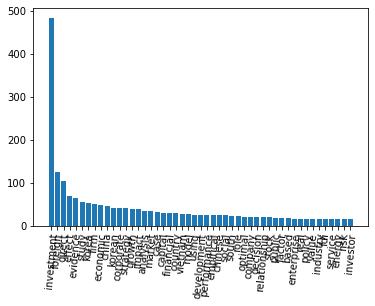

In [14]:
# 빈도 수를 통해서 word_count 객체를 내림차순으로 정렬하고
# 히스토그램으로 시각화

sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [15]:
# 년도별 논문수를 확인하기 위해 all_files_data_concat의 '출판일' column을 저장

all_files_data_concat['doc_count'] = 0 
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count() 
summary_year

,출판일,doc_count
0,2017,65
1,2018,85
2,2019,121
3,2020,125
4,2021,81
5,2022,23


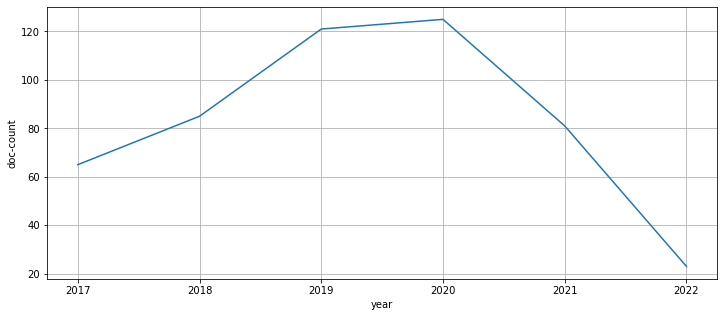

In [16]:
# 논문 수를 y축, 년도를 x축으로 하는 그래프 시각화(점차 논문수가 줄어듬)

plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

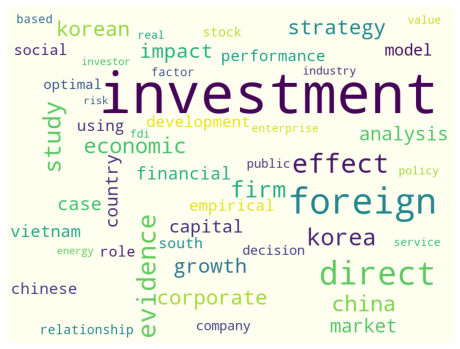

In [17]:
# 불용서를 설정하고(set(STOPWORDS)) 워드 클라우드 객체 생성(WordCloud())
# 워드 클라우드 객체 wc에 앞서 구한 단어 빈도수인 word_count를 담아 cloud 생성
# plt.imshow(cloud)를 통해 워드 클라우드 시각화

stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [18]:
# 만들어진 워드 클라우드인 cloud를 jpg파일로 저장

cloud.to_file("./riss_investment.jpg")